In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df=pd.read_csv(r"C:\Users\ASUS\Documents\DMV_praticals\Datasets\city_day.csv");

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [5]:
df.isnull().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

In [9]:
print(df.describe())

              PM2.5          PM10            NO           NO2           NOx  \
count  24933.000000  18391.000000  25949.000000  25946.000000  25346.000000   
mean      67.450578    118.127103     17.574730     28.560659     32.309123   
std       64.661449     90.605110     22.785846     24.474746     31.646011   
min        0.040000      0.010000      0.020000      0.010000      0.000000   
25%       28.820000     56.255000      5.630000     11.750000     12.820000   
50%       48.570000     95.680000      9.890000     21.690000     23.520000   
75%       80.590000    149.745000     19.950000     37.620000     40.127500   
max      949.990000   1000.000000    390.680000    362.210000    467.630000   

                NH3            CO           SO2            O3       Benzene  \
count  19203.000000  27472.000000  25677.000000  25509.000000  23908.000000   
mean      23.483476      2.248598     14.531977     34.491430      3.280840   
std       25.684275      6.962884     18.133775    

In [11]:
# Selecting main columns for analysis
columns_needed = ['Date', 'PM2.5', 'PM10', 'CO', 'NO2', 'SO2', 'AQI', 'AQI_Bucket']
df = df[columns_needed]

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Sort data by date
df = df.sort_values(by='Date')

# Drop missing AQI values
df = df.dropna(subset=['AQI'])

print("\nCleaned Data Sample:")
df.head()


Cleaned Data Sample:


,Date,PM2.5,PM10,CO,NO2,SO2,AQI,AQI_Bucket
10229,2015-01-01,313.22,607.98,15.20,36.39,9.25,472.0,Severe
10230,2015-01-02,186.18,269.55,9.54,32.87,6.65,454.0,Severe
10231,2015-01-03,87.18,131.90,10.61,30.31,2.65,143.0,Moderate
10232,2015-01-04,151.84,241.84,11.54,36.91,4.63,319.0,Very Poor
10233,2015-01-05,146.60,219.13,9.20,34.92,3.33,325.0,Very Poor


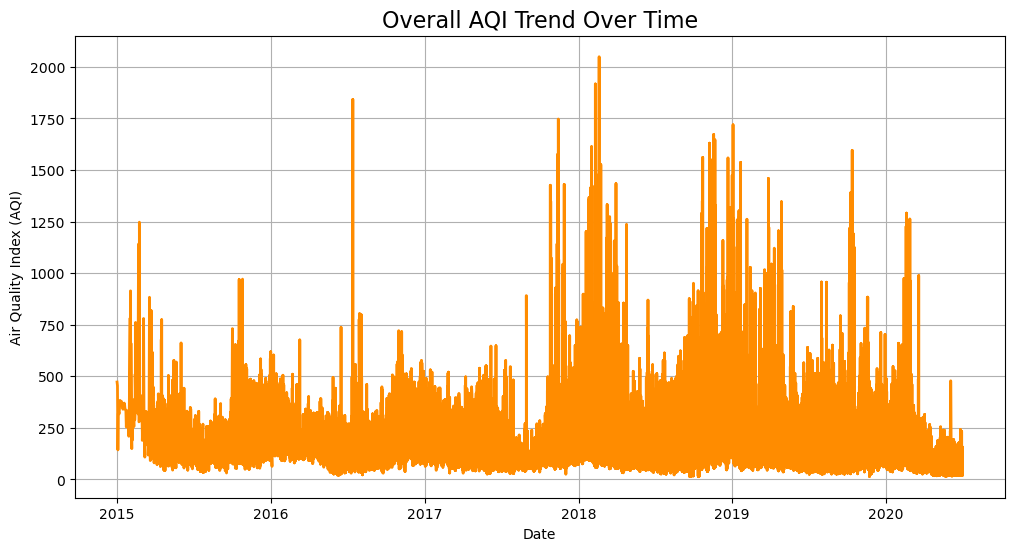

In [13]:
plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['AQI'], color='darkorange', linewidth=2)
plt.title("Overall AQI Trend Over Time", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Air Quality Index (AQI)")
plt.grid(True)
plt.show()

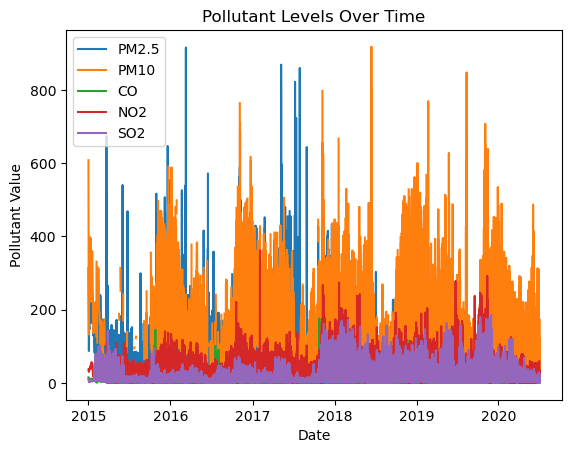

In [25]:
# Easy version - pollutant trends
plt.plot(df['Date'], df['PM2.5'], label='PM2.5')
plt.plot(df['Date'], df['PM10'], label='PM10')
plt.plot(df['Date'], df['CO'], label='CO')
plt.plot(df['Date'], df['NO2'], label='NO2')
plt.plot(df['Date'], df['SO2'], label='SO2')

plt.title("Pollutant Levels Over Time")
plt.xlabel("Date")
plt.ylabel("Pollutant Value")
plt.legend()
plt.show()


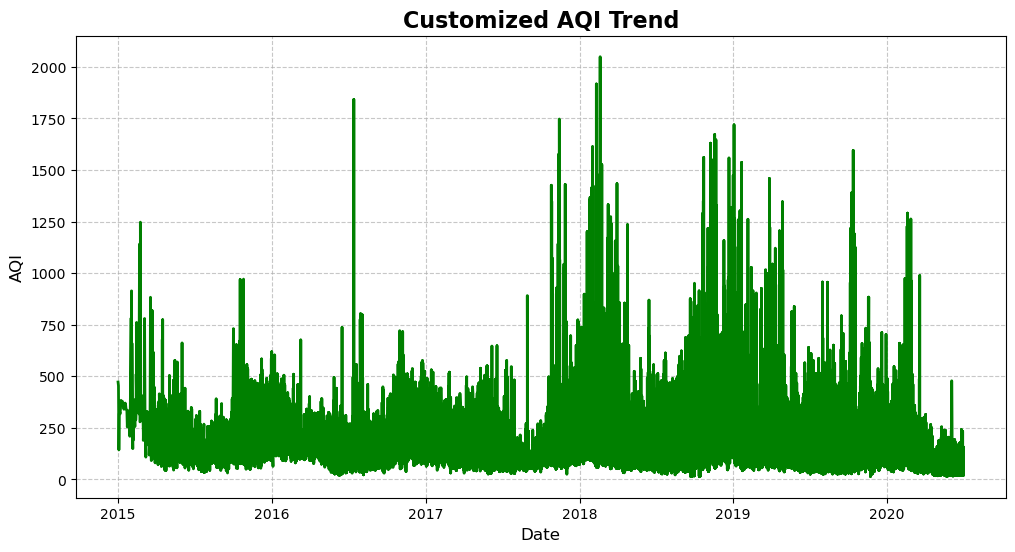

In [39]:
# Example of customized plot
plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['AQI'], color='green', linewidth=2, label='AQI')
plt.title("Customized AQI Trend", fontsize=16, fontweight='bold')
plt.xlabel("Date", fontsize=12)
plt.ylabel("AQI", fontsize=12)

plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


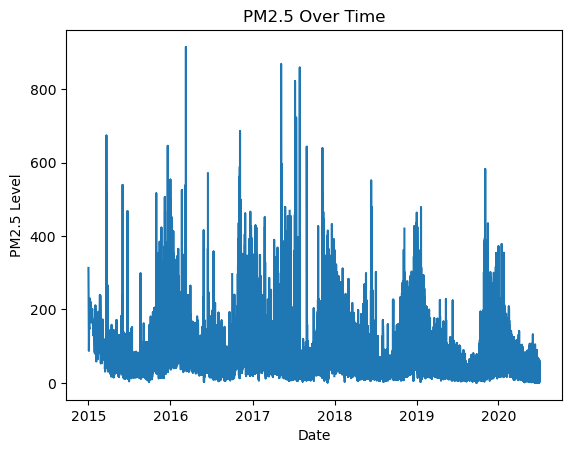

In [43]:
#Check pollution over time
plt.plot(df['Date'], df['PM2.5'])
plt.title("PM2.5 Over Time")
plt.xlabel("Date")
plt.ylabel("PM2.5 Level")
plt.show()


Text(0.5, 1.0, 'Pollutants Over Time')

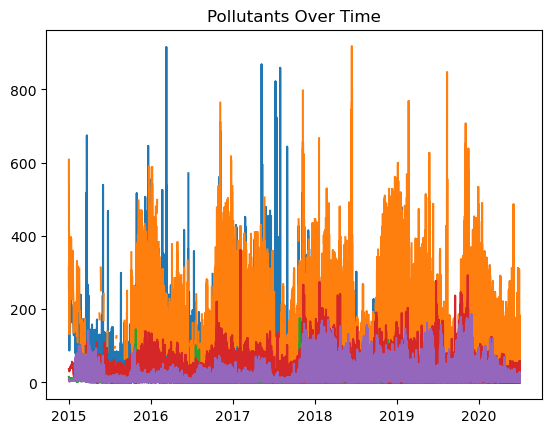

In [47]:
#Step 8: Compare all pollutants
for col in ['PM2.5', 'PM10', 'CO', 'NO2', 'SO2']:
    plt.plot(df['Date'], df[col], label=col)

plt.title("Pollutants Over Time")


In [49]:
#Find average pollution
df[['PM2.5', 'PM10', 'CO', 'NO2', 'SO2']].mean()


PM2.5     67.476613
PM10     118.454435
CO         2.345267
NO2       28.978391
SO2       14.362933
dtype: float64